# House Sales in King County, WA

The primary factors that play a crucial role in selling houses are the dimensions of both the land and the house. If you've ever explored property prices online, you're likely familiar with assessing a property's worth. If the listed price is excessively high, the probability of selling the house significantly diminishes. Conversely, setting a price that's too low for a house you intend to sell will result in missed opportunities for potential profits.


To make sure a home is fairly priced, an analysis towards a house should always be performed, before buying or selling. This analysis will compare the values of homes in King County and what are the factors that affecting price of a house in King County.

# Restatement of the Problem 
Most of people know how to figuring out a value of a house based on the size of the property and and the location of the property itself , however there are many more features that's weight in before figuring out the price of a home.

Figuring out a price of a home are more complicated than just the size and location, acocoring to this website (https://www.thebalance.com/the-worst-home-selling-mistake-1798971) even some professional property agent still having a hard times when it comes to establishing a property value


## Getting Started


## Importing Common Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the data

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\workspace\week 1\Python\data\kc_house_data.csv",parse_dates=['date'])
# parsing the 'date' column as datetime objects
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### EXPLORING THE VARIABLES


In [3]:
print(df.info())
print(df.shape)

### The dataset has 21613 rows and 21 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161


In this dataset, there are 21 different  variables which are  information for each house. These pieces of information describe different aspects of the houses, like their price, size, design, view, history, and location. Each house has its own set of these characteristics. One of the pieces of information is the house's ID, which is like its special code. So, we can use these details to understand and compare the houses better.
1.	id: identifier for each house listing.
2.	date: Date when the house listing was recorded.
3.	price: Price of the house.
4.	bedrooms: Number of bedrooms in the house.
5.	bathrooms: Number of bathrooms in the house (including fractional values which may include the presence of different types of bathrooms).
6.	sqft_living: Square footage of the living space in the house.
7.	sqft_lot: Square footage of  the house is situated on.
8.	floors: Number of floors in the house(may have semi floors such as atic or only balcony).
9.	waterfront: Indicates whether the house is waterfront property .
10.	view: Level of view from the house .
11.	condition: Condition of the house .
12.	grade: Grade of the house .
13.	sqft_above: Square footage of the house above ground level.
14.	sqft_basement: Square footage of the basement in the house.
15.	yr_built: Year the house was built.
16.	yr_renovated: Year the house was last renovated .
17.	zipcode: Zip code of the area where the house is located.
18.	lat: Latitude coordinate of the house location.
19.	long: Longitude coordinate of the house location.
20.	sqft_living15: Square footage of the living space of the nearest 15 neighbors.
21.	sqft_lot15: Square footage of the lot of the nearest 15 neighbors.

In [4]:
with pd.option_context('display.max_rows', 15, 'display.max_columns', None):
    display(df)
#Additional way to display our data set ,showing all columns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


 ### Checking Types of Variables

In [5]:
column_descr = []
for name in df.columns:
  column_descr.append(
      [
       name,
       df[name].dtypes,
       df[name].isnull().sum(),
       round(df[name].isnull().sum()/len(df)*100, 2),
       df[name].nunique(),
       df[name].unique()]
       )

df_column_desc = pd.DataFrame(column_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])

df_column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,datetime64[ns],0,0.0,372,"[2014-10-13T00:00:00.000000000, 2014-12-09T00:..."
2,price,float64,0,0.0,3625,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


#### CATEGORICAL
1.	id: Identifier for each house listing.
2.	date: Date when the house listing was recorded.
3.	bedrooms: Number of bedrooms in the house.
4.	bathrooms: Number of bathrooms in the house (including fractional values which may include different types of bathrooms).
5.	waterfront: Indicates whether the house is waterfront property.
6.	view: Level of view from the house.
7.	condition: Condition of the house.
8.	grade: Grade of the house.



#### NUMERICAL
1.	price: Price of the house.
2.	sqft_living: Square footage of the living space in the house.
3.	sqft_lot: Square footage of the land the house is situated on.
4.	floors: Number of floors in the house (may include semi-floors).
5.	sqft_above: Square footage of the house above ground level.
6.	sqft_basement: Square footage of the basement in the house.
7.	yr_built: Year the house was built.
8.	yr_renovated: Year the house was last renovated.
9.	lat: Latitude coordinate of the house location.
10.	long: Longitude coordinate of the house location.
11.	sqft_living15: Square footage of the living space of the nearest 15 neighbors.
12.	sqft_lot15: Square footage of the lot of the nearest 15 neighbors.




### Important Points for Spotting Numerical Categorical Data

#### Recognizing numerical categorical data involves identifying columns that contain numerical values but are actually used to represent categories or labels rather than continuous quantities. Here are three key points to help you recognize numerical categorical data:

#### Limited Number of Unique Values: Numerical categorical columns typically have a small, fixed number of unique values. These values represent different categories or labels rather than a wide range of continuous numerical values.

#### No Meaningful Arithmetic Operations: In numerical categorical columns, arithmetic operations (e.g., addition, subtraction) often don't make sense. The values are used as labels, and performing arithmetic on them doesn't provide meaningful results.

#### Semantic Meaning: Numerical categorical values carry a semantic meaning that represents categories or labels. For example, in my code below, wich in this case for example the the id could be the perfect example due to fact that although id type is integer but this integer is like representing name of the house.
  

### Descriptive Stats


In [6]:
### Descriptive Stats
df.describe()
## the average house price in king county is around 540000 
# the maximum house price in king county is 7.7 million which pretty far from the mean and median
# there's house with no bedroom and house with no bath room which is kind of weird we will investigate this further
# maximum numbers of bedrooms in this dataset is 33
# the average of the houses were built in 1975

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


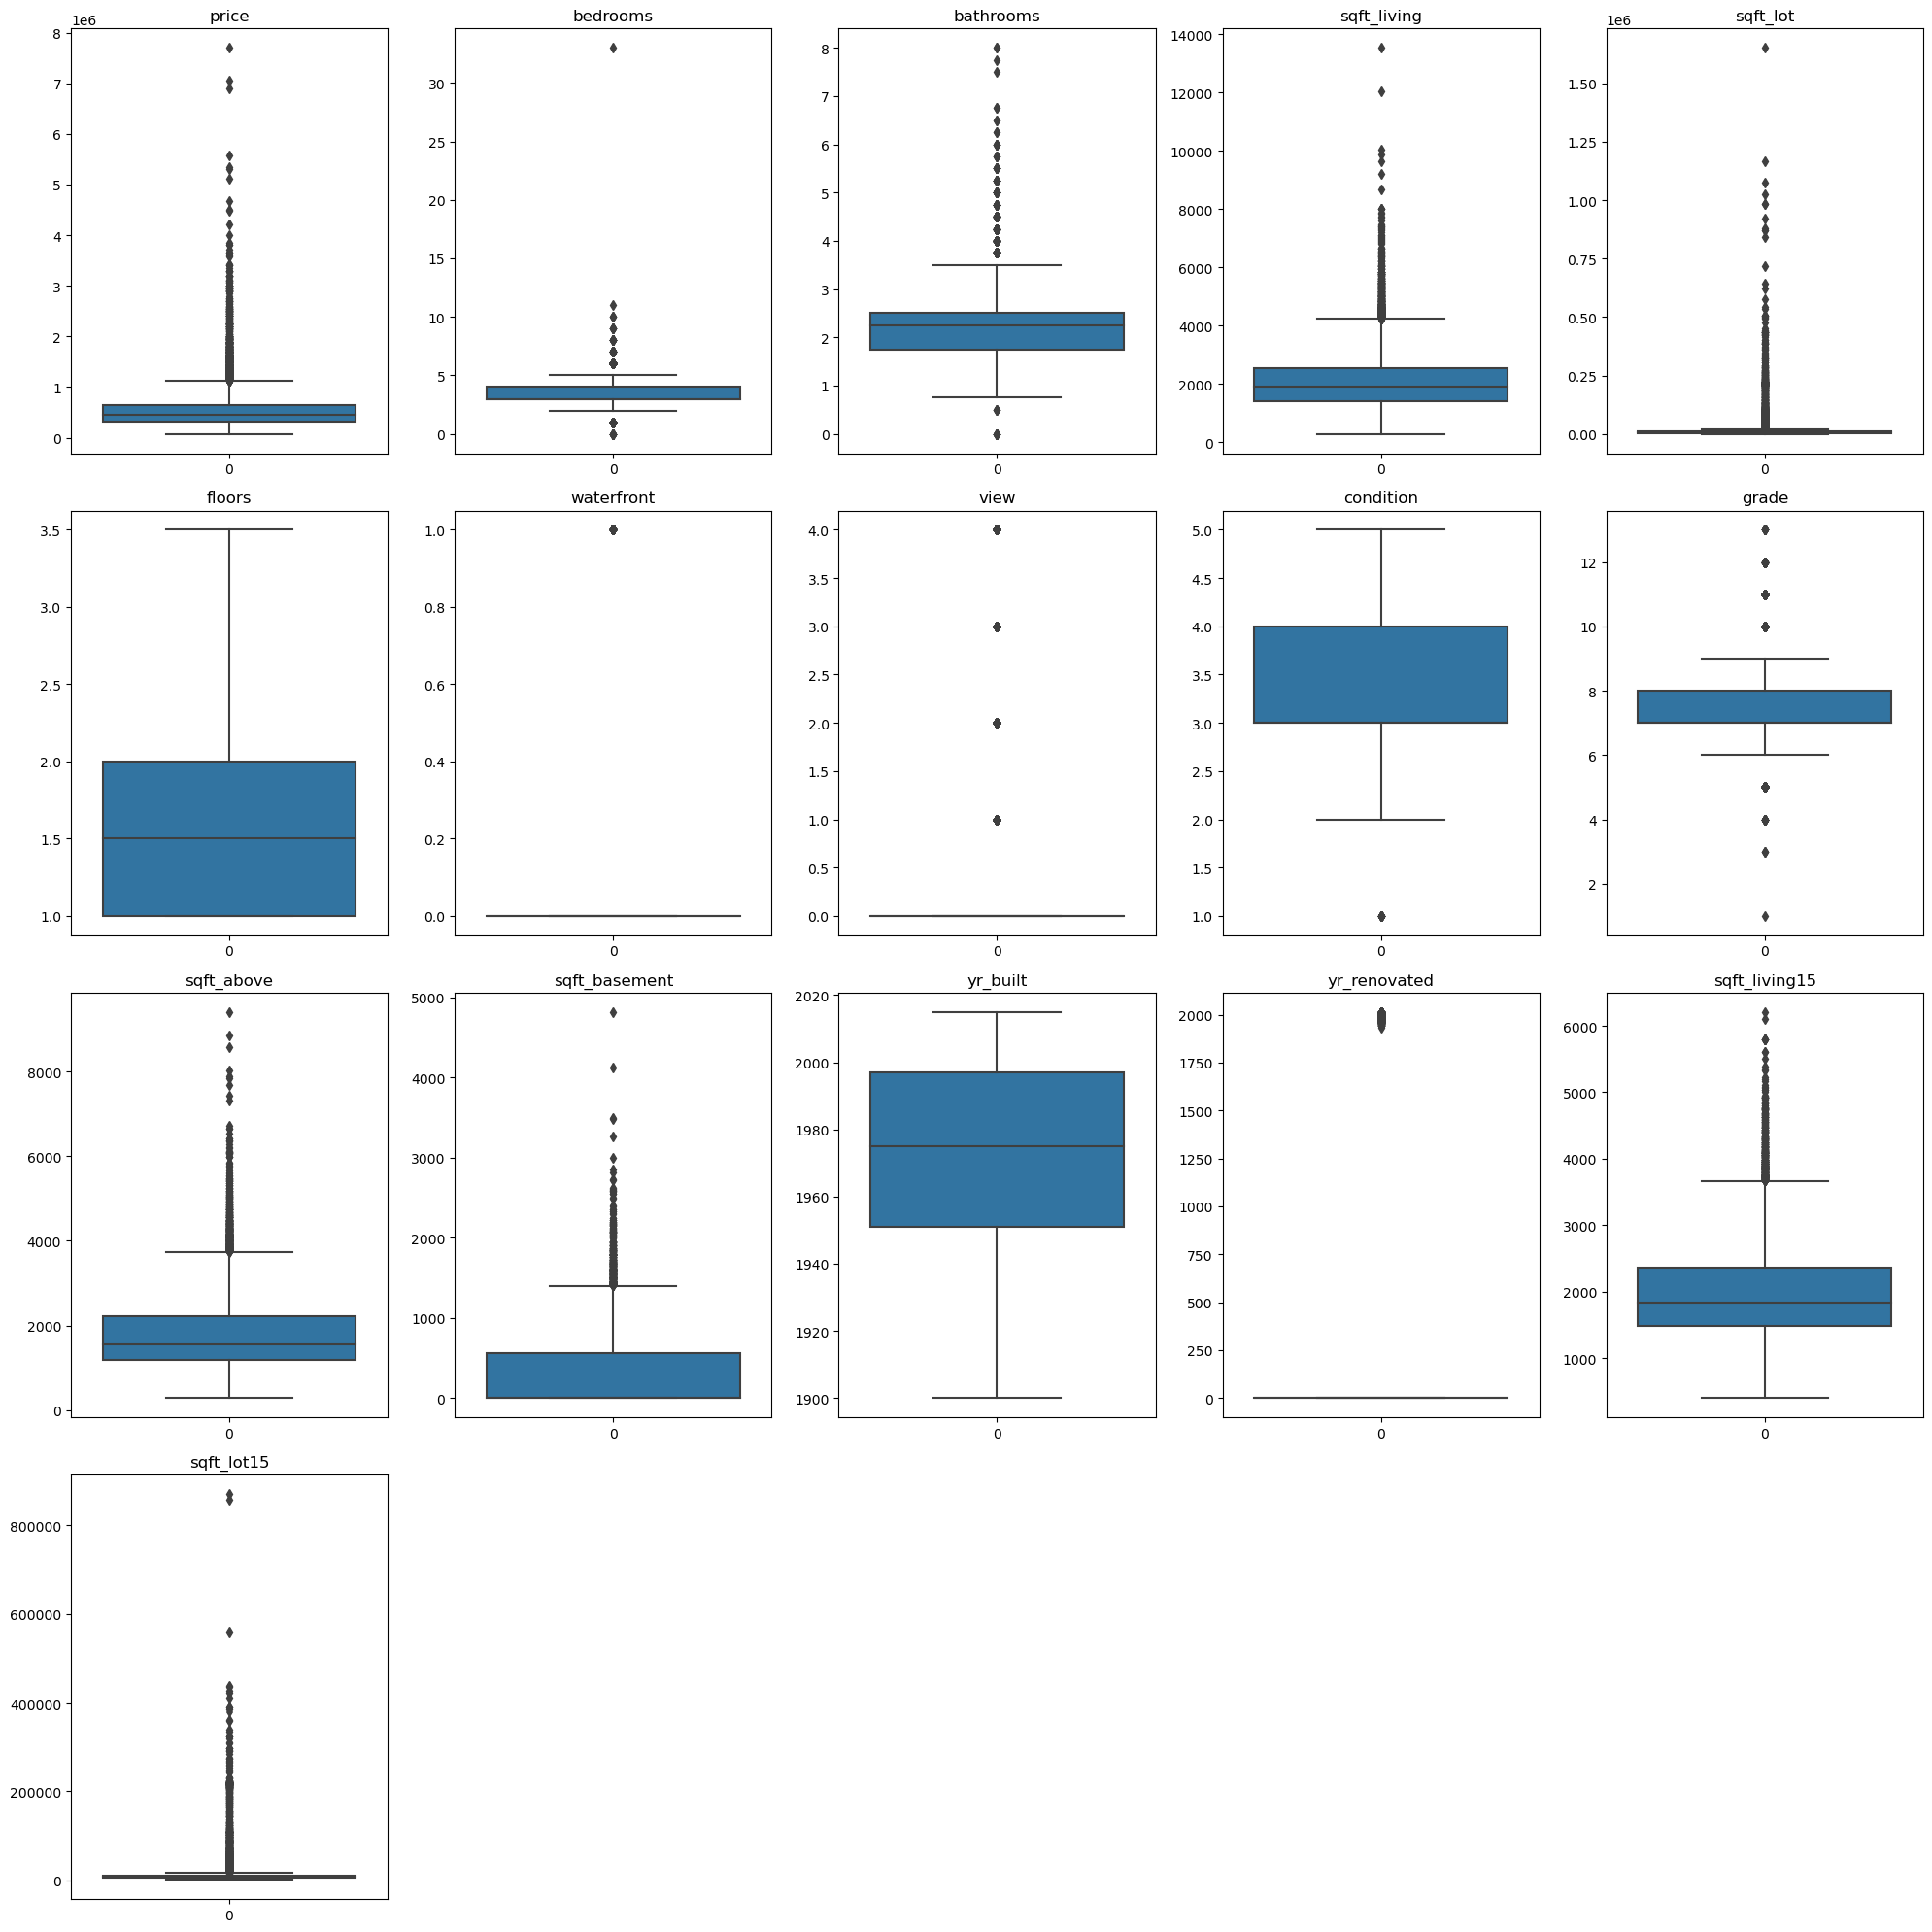

In [7]:
# ploting boxplot for all the columns to see distribution of the data in each columns 
# Drop specific columns from the DataFrame
df_describe = df.drop(columns=['id', 'date', 'lat', 'long', 'zipcode'])

# Create a new figure with specified size
plt.figure(figsize=(20, 20))

# Initialize a variable to keep track of subplot position
x = 1

# Iterate through each column in the modified DataFrame
for column in df_describe.columns:
    # Create a subplot within the main figure grid
    plt.subplot(4, 5, x)
    
    # Create a box plot for the current column's data
    sns.boxplot(df_describe[column])
    
    # Set the title of the subplot to the column name
    plt.title(column)
    
    # Increment the subplot position counter
    x += 1

# Adjust subplot layout for better spacing
plt.tight_layout()

# Display the complete figure with all subplots and titles
plt.show()
# from this box plot below we can see there are outliers in many of the columns
# i will not remove the outliers in the columns since its common to have outliers when it comes to house sales in real life

### 0 BEDROOMS-BATHROOMS!!!!
##### (In what  reality do houses decide to skip out on bedrooms and bathrooms?)

In [8]:

df[df['bedrooms'] < 1]

# there are rows that does not have bedrooms, which is kind of weird for a house
# i will treat this like a null value and fill it with median numbers of bedroom in a house 
# same goes to the bathrooms with 0 values as well 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1100000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1300000.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [9]:
# Since House with no bathroom / bedrooms is kind of unsual i will replace the 0 value in both of the columns with median
# I used median instead of mean to replace this unsual values because of there is an outliers in both of the columns

df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

In [10]:
 ### Rechecking 
df[df['bedrooms'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


##### now both of the bedrooms and bathrooms has no null value 
##### there are some float values in the number of the bathrooms, and according to this
##### it's normal not to have a full bathroom size
##### - source :
#####  https://illinado.com/what-is-a-quarter-bath/#:~:text=Well%2C%20a%20quarter%20bath%20is,it%20only%20has%20a%20toilet.

###  Exploratory Data Analysis (EDA) : 
#### Is the process of discovering insights from the main characteristics of a dataset to guide further analysis.

#### Create Grouping from grade
    - 1 - 5 low quality construction & design
    - 6 - 10 average quality consturction & design
    - 11 - 13 high quality of construction & design


In [11]:
# Define bin edges and labels for creating a 'Quality' category based on 'grade'.
quality = [1, 5, 10, 13]  # Specify the bin edges.
label = ['Low', 'Average', 'High']  # Corresponding labels for the bins.

# Used the pd.cut() function to categorize 'grade' values into 'Quality' bins.
df['Quality'] = pd.cut(df['grade'], bins=quality, labels=label)

# Display the first few rows of the DataFrame with the newly added 'Quality' column.
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Average
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Average


This code  creates a categorical 'Quality' column in the DataFrame by categorizing 'grade' values into bins(intervals) defined by quality and assigning corresponding labels from the label list. The resulting DataFrame with the added column is then displayed to observe the changes.

### Age of Building
#### Create building age column by substracting the date yeat with yr_built column age column 
    

In [12]:
df['age'] = df['date'].dt.year - df['yr_built']
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Average,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Average,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Average,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Average,28


In [13]:
df['age'].sort_values()
# the date coloumns explain when the date of the home sale
# this explain that houses that has less than one year of age has been sold before it even built
# the oldest house is 115 years old

1763      -1
8039      -1
21372     -1
7526      -1
19805     -1
        ... 
9005     115
8732     115
11610    115
2977     115
14569    115
Name: age, Length: 21613, dtype: int64

In [14]:
# binning the age of the building column

bin_age = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']

df['age_group'] = pd.cut(df['age'], bins = bin_age, labels = labels)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Average,59,51-75
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Average,63,51-75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Average,82,76-100
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Average,49,26-50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Average,28,26-50


In [15]:
df['price_per_sqft'] = df['price'] / df['sqft_lot']
df.head()

# getting price per sqft

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group,price_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,Average,59,51-75,39.274336
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,Average,63,51-75,74.288870
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,Average,82,76-100,18.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,Average,49,26-50,120.800000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,Average,28,26-50,63.118812


#### Categorizing Price Columns 


In [16]:
price =[0,250000,500000,750000, 1000000, 2000000, df['price'].max()]
label_price = ['upto 250k', 'upto 500k', 'upto 750k','upto 1mil','upto 2mil', 'more than 2 mil']

df['price_group'] = pd.cut(df['price'], bins = price, labels = label_price)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group,price_per_sqft,price_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,Average,59,51-75,39.274336,upto 250k
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,Average,63,51-75,74.288870,upto 750k
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,Average,82,76-100,18.000000,upto 250k
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,Average,49,26-50,120.800000,upto 750k
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,Average,28,26-50,63.118812,upto 750k


In [17]:
df['bedrooms'].value_counts(normalize = True).mul(100)

# almost half of the house in this dataset has 3 bedrooms

3     45.514274
4     31.841947
2     12.770092
5      7.407579
6      1.258502
1      0.920742
7      0.175820
8      0.060149
9      0.027761
10     0.013881
11     0.004627
33     0.004627
Name: bedrooms, dtype: float64

In [18]:
df['bathrooms'].value_counts(normalize = True)

# the bathrooms number is more varied compared to the bedrooms in each houses 
# almost a quarter of the houses in king county has 2.5 bathrooms

2.50    0.248924
1.00    0.178226
1.75    0.141026
2.25    0.095174
2.00    0.089298
1.50    0.066904
2.75    0.054828
3.00    0.034840
3.50    0.033822
3.25    0.027252
3.75    0.007172
4.00    0.006293
4.50    0.004627
4.25    0.003655
0.75    0.003331
4.75    0.001064
5.00    0.000972
5.25    0.000601
5.50    0.000463
1.25    0.000416
6.00    0.000278
0.50    0.000185
5.75    0.000185
6.75    0.000093
8.00    0.000093
6.25    0.000093
6.50    0.000093
7.50    0.000046
7.75    0.000046
Name: bathrooms, dtype: float64

In [19]:
df['age_group'].value_counts()

# majority of the houses in king county age between 26 to 75 years old 

26-50     5909
51-75     5403
11-25     3747
76-100    2086
6-10      2067
>100      1012
1-5        947
<1         442
Name: age_group, dtype: int64

In [20]:
df['yr_renovated'].value_counts()

## most of the houses in this dataset never been renovated since they've been built

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
## finding the most common zipcode in this dataset

df['zipcode'].value_counts()

# the most common zipcode in this dataset is 98103

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [22]:
df['Quality'].value_counts()

# most of the houses are in Average condition  

Average    20836
High         502
Low          274
Name: Quality, dtype: int64

### Examining individual factors for prices above median.
Looking specifically at properties priced higher than the median, this method is well-suited for understanding the unique characteristics of higher-end properties in the dataset, By utilizing the median, which is less influenced by outliers than the mean.


In [23]:
# the median price of the house is 450000
# do more univariate analysis of the house prices that's more than the median price

df_price_exp = df[df['price'] > 450000]
df_price_exp.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group,price_per_sqft,price_group
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,Average,63,51-75,74.288870,upto 750k
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,Average,49,26-50,120.800000,upto 750k
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,Average,28,26-50,63.118812,upto 750k
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,98053,47.6561,-122.005,4760,101930,High,13,11-25,12.067105,upto 2mil
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,...,98007,47.6007,-122.145,2210,8925,Average,50,26-50,67.629645,upto 750k


In [24]:
df_price_exp['bedrooms'].value_counts(normalize = True)

# 4 bedrooms seems to be the majority number of bedrooms for house that's above the median prices 

4     0.404503
3     0.380035
5     0.108847
2     0.081031
6     0.018420
7     0.002791
1     0.002512
8     0.000930
9     0.000465
10    0.000279
11    0.000093
33    0.000093
Name: bedrooms, dtype: float64

In [25]:
df_price_exp['bathrooms'].value_counts(normalize = True)

# the number of bathrooms (2.5) seems to be  the same for houses that's above the median price and all the houses

2.50    0.290539
1.75    0.121872
2.25    0.102800
2.75    0.080380
2.00    0.077123
1.00    0.073216
3.50    0.062704
3.00    0.050702
3.25    0.047446
1.50    0.042236
3.75    0.013769
4.00    0.011908
4.50    0.008931
4.25    0.007350
4.75    0.002140
5.00    0.001861
5.25    0.001116
5.50    0.000930
0.75    0.000744
6.00    0.000558
1.25    0.000465
5.75    0.000372
6.75    0.000186
8.00    0.000186
6.25    0.000186
6.50    0.000186
7.75    0.000093
Name: bathrooms, dtype: float64

In [26]:
df_price_exp['age_group'].value_counts()

# majority of the houses in king county that's above the median price age between 26 to 50 years old 


26-50     2628
11-25     2101
51-75     2057
76-100    1253
6-10      1202
>100       667
1-5        520
<1         321
Name: age_group, dtype: int64

In [27]:
df_price_exp['Quality'].value_counts() 

# House that's above the median price are majority in average Qualit as well 
# out of 502 high quality houses, 501 houses that's high quality is above the median price
# there's a drop in low Quality houses in house that's above the median price
# df['Quality'].value_counts() 
#Average    20836
#High         502
#Low          274

Average    10235
High         501
Low           13
Name: Quality, dtype: int64

In [28]:
df_price_exp['Quality'].value_counts() / df['Quality'].value_counts()

# percentage Quality comparison of houses that's above the median price to all houses
# Insight:  House with High Quality will most likely to be valued above the median price

Average    0.491217
High       0.998008
Low        0.047445
Name: Quality, dtype: float64

## MULTIVARIATE ANALYSIS

 ###  1 BEDROOM AND PRICES

In [29]:
df.groupby('bedrooms')['price'].median().sort_values(ascending = False)

# The number of bedroom has somehow positive correlation with the price of the house 

bedrooms
9     817000.0
7     728580.0
8     700000.0
10    660000.0
6     650000.0
33    640000.0
5     620000.0
4     549997.5
11    520000.0
3     412500.0
2     374000.0
1     299000.0
Name: price, dtype: float64

In [30]:
df.groupby('bathrooms')['price'].median().sort_values(ascending = False)
# number of bathrooms has somewhat positive correlation with price

bathrooms
7.75    6890000.0
8.00    4990000.0
6.25    3095000.0
6.00    2895000.0
6.75    2735000.0
5.50    2340000.0
4.75    2300000.0
5.75    1930000.0
6.50    1710000.0
5.00    1430000.0
5.25    1420000.0
4.25    1380000.0
3.75    1070000.0
4.50    1060000.0
4.00    1055000.0
3.25     835000.0
3.50     820000.0
2.75     605000.0
3.00     600000.0
1.25     516500.0
2.50     499950.0
2.25     472000.0
7.50     450000.0
2.00     423250.0
1.75     422900.0
1.50     370000.0
1.00     320000.0
0.75     273500.0
0.50     264000.0
Name: price, dtype: float64

### Quality and Price


In [31]:
df.groupby('Quality')['price'].median() / df['price'].median()
##  to calculate the median price for each quality group in a DataFrame and then divide each of those median values by the overall median price in the DataFrame
## House with High quality have are 3 times more expensive than the median value of all the houses

Quality
Low        0.502722
Average    0.999889
High       3.133333
Name: price, dtype: float64

### House Age Group and Price


In [32]:
pd.crosstab(index = df['age_group'], columns = 'Median Value', values = df['price'], aggfunc = 'median').sort_values('Median Value',ascending = False)

# House with less than one year of age have the higest value of median prices compared to other house age group
# pd.crosstab function from the pandas library to create a cross-tabulation (also known as a contingency table) that summarizes the relationship between two variables: 'age_group' and 'price'

col_0,Median Value
age_group,
<1,598163.0
>100,550000.0
76-100,516100.0
11-25,497000.0
6-10,495000.0
1-5,489950.0
26-50,425000.0
51-75,395000.0


### Median Prices for every zipcode

In [33]:
# zipcode and median price of the houses 

pd.crosstab(index = df['zipcode'], columns = ['Median Price'], values = df['price'], aggfunc = 'median').sort_values('Median Price' ,ascending = False)[0:10]

# 98039 has the highest median prices of houses with median price of 1.892.500 $  
# 10 zip code with the highest median house prices

col_0,Median Price
zipcode,
98039,1895000.0
98004,1150000.0
98040,993750.0
98112,915000.0
98005,765475.0
98006,760184.5
98119,744975.0
98075,739999.0
98109,736000.0


In [34]:
df.groupby('zipcode')[['price', 'sqft_lot']].median().sort_values('price', ascending = False)[0:10]

# top 10 zipcode with the highest median price majority has more than 10.000 sqft lot


,price,sqft_lot
zipcode,,
98039,1895000.0,17188.5
98004,1150000.0,11119.0
98040,993750.0,11951.5
98112,915000.0,4426.0
98005,765475.0,12220.0
98006,760184.5,10447.5
98119,744975.0,3600.0
98075,739999.0,10955.0
98109,736000.0,3600.0


In [35]:
correlation = df.corr()
correlation['price'].sort_values(ascending = False)[1:]
#The df.corr() function is used to calculate the correlation between numerical columns in a DataFrame df. Correlation measures the strength and direction of the linear relationship between two variables. 

# columns ordered from the higest posisve correlation to the lowest

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\1726885470.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


sqft_living       0.702044
grade             0.667463
sqft_above        0.605566
sqft_living15     0.585374
bathrooms         0.525713
view              0.397346
sqft_basement     0.323837
bedrooms          0.308860
price_per_sqft    0.308078
lat               0.306919
waterfront        0.266331
floors            0.256786
yr_renovated      0.126442
sqft_lot          0.089655
sqft_lot15        0.082456
yr_built          0.053982
condition         0.036392
long              0.021571
id               -0.016797
zipcode          -0.053168
age              -0.053921
Name: price, dtype: float64

In [36]:
df.groupby('zipcode')[['price', 'sqft_lot15', 'sqft_lot']].median().sort_values('price', ascending = False)[0:10]

# this conclude that bigger house tend to be on the same neighborhood 
# House size is correlated to neighborhood house size

,price,sqft_lot15,sqft_lot
zipcode,,,
98039,1895000.0,16582.5,17188.5
98004,1150000.0,11377.0,11119.0
98040,993750.0,11664.5,11951.5
98112,915000.0,4500.0,4426.0
98005,765475.0,11623.5,12220.0
98006,760184.5,10191.5,10447.5
98119,744975.0,3600.0,3600.0
98075,739999.0,10295.0,10955.0
98109,736000.0,3600.0,3600.0


Text(0.5, 1.0, 'Living Size Correlation with Neighbors Living Size')

<Figure size 1000x500 with 0 Axes>

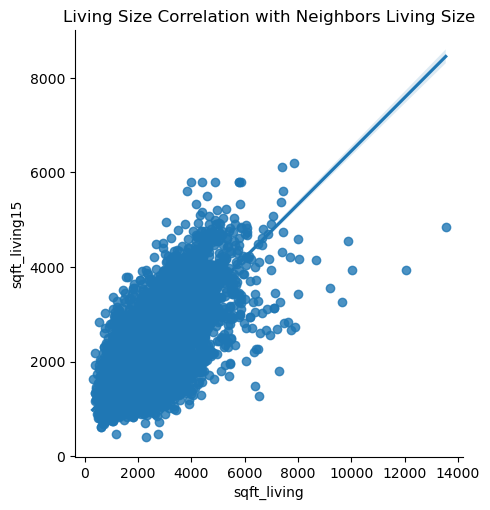

In [37]:
plt.figure(figsize = (10, 5))
sns.lmplot(x = 'sqft_living', y = 'sqft_living15', data = df)
plt.title('Living Size Correlation with Neighbors Living Size')


## the size of living space of nearest 15 neighbors are highly corelated with the living size of the houses

# Conclusion: Houses in the same neighborhood tend to have similar sizes
# Houses in the same neighborhood tend to be in the similar price Group

### Correlation Guide 
- Perfect Positive Correlation (r = 1.0)
Strong Positive Correlation (0.7 ≤ r < 1.0)
Moderate Positive Correlation (0.3 ≤ r < 0.7)
Weak Positive Correlation (0 ≤ r < 0.3)
No Correlation (r ≈ 0)
Weak Negative Correlation (−0.3 < r ≤ 0)
Moderate Negative Correlation (−0.7 < r ≤ −0.3)
Strong Negative Correlation (−1.0 < r ≤ −0.7)
Perfect Negative Correlation (r = -1.0)

# Conclusion 


- **Houses with less than one year of age has the highest median price of all age group**
- Majority of the houses are in average condition
- **501 out of 502 houses with high quality** are priced above the median price of the houses 
- **Majority of houses price around 250 - 500k** in King County
- House lot size is positively correlated with neighborhood house lot size
- House that has 3 bedrooms are more the most frequent house that's sold in king county
- the lot size of your nearest 15 neighbors are highly corelated to with house lot size




# Recommendation


 - **Quality, Quality, and Quality.** This Analysis shows us that quality of a house play a major role when it comes to figuring out house prices. ( the quality here means the quality of construction), if you ever to sell a home in King county Washington make sure to renovate it first
     - **House with high Quality has 3x the average value of house with average quality and almost 7 X the average value of house with low quality**
     - **501 out of 502 houses with high quality** are priced above the median price of the houses 
- **Increase Your Chances to sell the house by having 3 or 4 bedrooms**